In [761]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

Data Modeling

In [762]:
#create a DF with our cleaned data 
df = pd.read_csv('cleaneddata.csv')

In [763]:
#specify our identifiers for the future use 
identifiers =  ['artist_name', 'track_name','release_date', 'topic', 'genre'] 

In [764]:
#creating a new DF for data modeling named X1 
X1 = df.drop(columns=identifiers)


c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

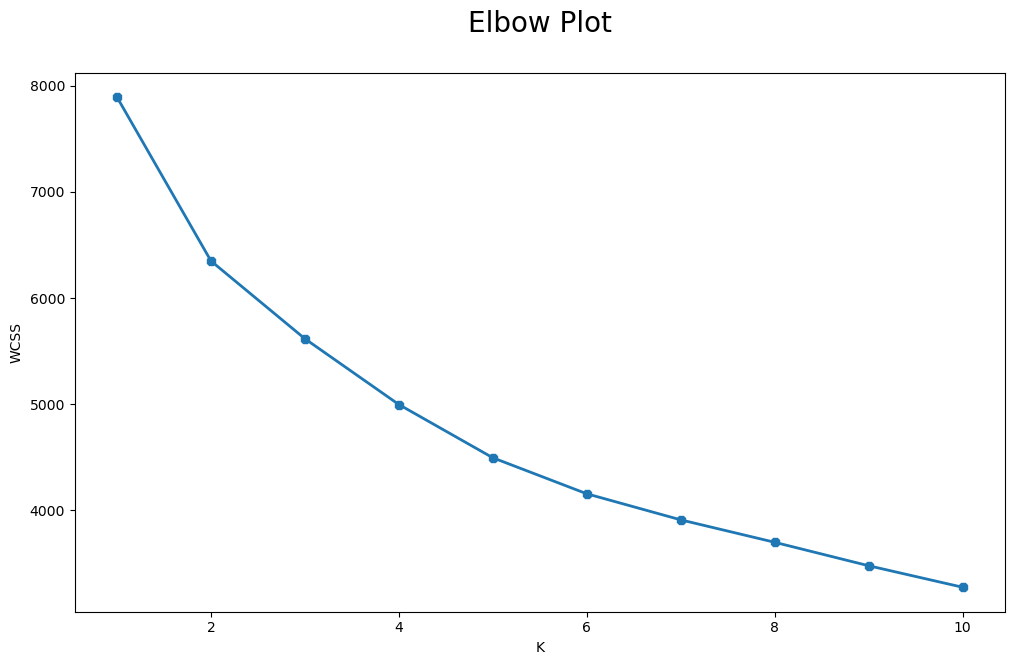

c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

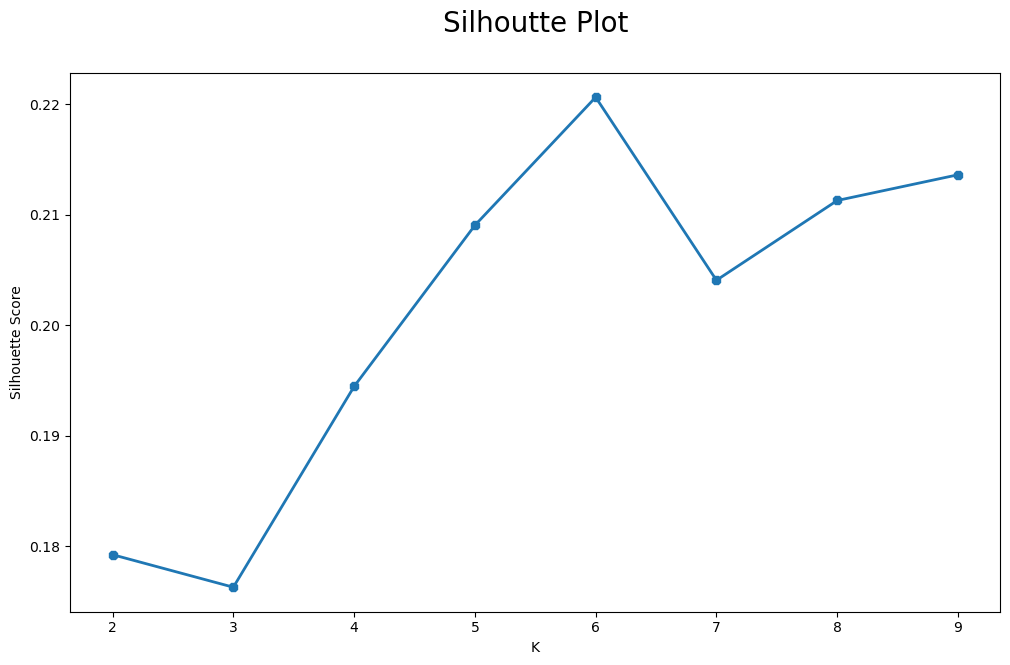

In [765]:
#we need to determine the number of clusters to use, we will use Elbow and Silhoutte Plots to help us out 
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Based on the plots above we could choose 5 or 8 as the number of clusters. Since 5 is the number of clusters in Elbow and Silhoutte plots, this is what I choose. 

In [766]:
#parameters like n_init and random state give us ability to have the 'fixed' and consitent results  
kmeans = KMeans(n_clusters=5, init = 'k-means++', n_init=20, random_state = 42)
kmeans.fit(X1)

KMeans(n_clusters=5, n_init=20, random_state=42)

In [767]:
#using cluster_centers_ to see if our model actually can separate songs by classes 
kmeans.cluster_centers_

array([[0.01990843, 0.03903725, 0.29942513, 0.08307236, 0.01783884,
        0.01570668, 0.05245606, 0.07751555, 0.02083251, 0.07175213,
        0.04567733, 0.05166893, 0.02613316, 0.05015528, 0.04056191,
        0.27494409],
       [0.01277655, 0.43198933, 0.05057267, 0.03677794, 0.01654629,
        0.01549651, 0.02304426, 0.07165492, 0.02599957, 0.02811222,
        0.04935773, 0.05410452, 0.03154395, 0.0485764 , 0.02322133,
        0.32270767],
       [0.0197755 , 0.05051192, 0.04018575, 0.03060672, 0.02576714,
        0.01670181, 0.01370362, 0.06656822, 0.46475604, 0.02312195,
        0.0656682 , 0.02696331, 0.01601772, 0.02442632, 0.02072766,
        0.25276277],
       [0.02817538, 0.05172367, 0.13048662, 0.07783328, 0.01489396,
        0.02170092, 0.09073995, 0.07864528, 0.04661576, 0.11212996,
        0.04552527, 0.05758719, 0.02524743, 0.1003664 , 0.03938431,
        0.73687513],
       [0.0214577 , 0.03995688, 0.05094563, 0.04184571, 0.01456426,
        0.01331628, 0.03681111, 

In [768]:
#double checking the classifications abilities. It is working! 
kmeans.predict(X1)

array([3, 3, 3, ..., 2, 2, 2])

Time to TEST our model 

In [769]:
#uploading our test data 
test = pd.read_csv("CleanedTestData.csv")
#creating Y df and droping the identifiers
Y = test.drop(columns=identifiers)
#using the model on the test data 
kmeans.predict(Y)

array([1, 0, 1, 3, 3, 3, 2, 3, 0, 1])

Since our model is working, time to update our DFs with the new column called 'Class' and store our K-means classification score 

In [770]:
df['Class'] = kmeans.predict(X1)
test['Class'] = kmeans.predict(Y)

Time for some visualization

c:\Users\babur\Anaconda3\envs\phase1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


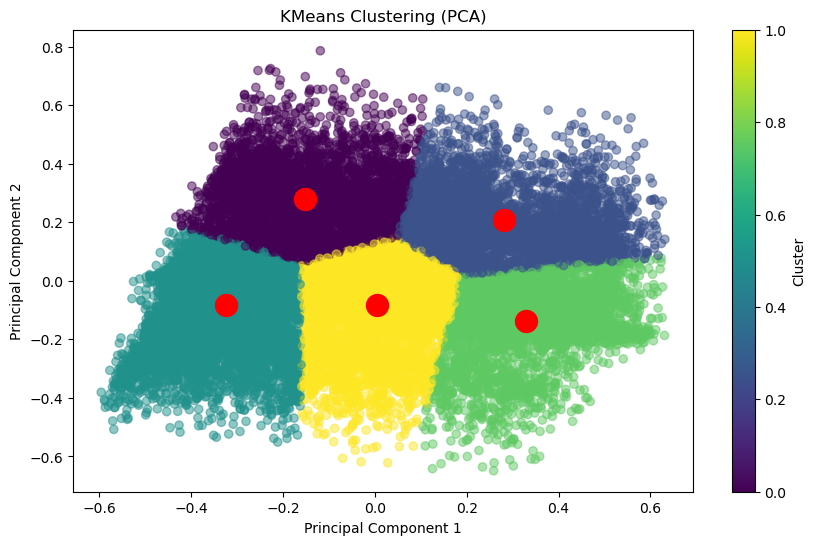

In [775]:
# First, since we have a lot of dimensions, we need to decide which one to use...we can use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X1)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# time to create a plot 
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', s=250)
plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

Results from the above shows that our classification model is working and can classify different type of music

Since the results from the above could be confusing, to simplify it we can simplify it like this: 

In [772]:
test_results = test[['artist_name', 'track_name', 'release_date', 'Class']]

print("Your Recommendation of Songs")
test_results

Your Recommendation of Songs


,artist_name,track_name,release_date,Class
0,godsmack,immune,1998,1
1,dennis brown,second chance,1993,0
2,the black crowes,sister luck,1990,1
3,jerry lee lewis,your cheating heart,1960,3
4,paul anka,eso beso,1966,3
5,noro morales,silencio,1952,3
6,rage against the machine,pistol grip pump,2000,2
7,taste,railway and gun,1970,3
8,randy travis,messin' with my mind,1986,0
9,paramore,playing god,2009,1


To make it even either, here is the interactive part (possible deployment concept)

In [773]:
#Interactive Overview, just type what name of the song you are listening to and I will help you to find the song based on this classifier model 
#Part 1 

print("Here is the list of our songs:\n")
test_results['track_name']

Here is the list of our songs:



0                  immune
1           second chance
2             sister luck
3     your cheating heart
4                eso beso
5                silencio
6        pistol grip pump
7         railway and gun
8    messin' with my mind
9             playing god
Name: track_name, dtype: object

In [774]:
# part 2 simple version of the concept that can help suggest songs based on your currently playing song. 
select1 = input("What song are you listing to? (choose song from the list OR just type the corresponded number)")
select1 

if select1 == "immune" or select1 == "0":
    print("\nThe next song for you is: \n Sister Luck by The Black Crowes \n Playing God by Paramore")
elif select1 == "second chance" or select1 =="1":
    print("\nThe next song for you is: \n Messin' with my mind by Randy Travis")
elif select1 == "sister luck" or select1 =="2":
    print("\nThe next song for you is: \n Immune by Godsmack \n Playing God by Paramore ")
elif select1 == "your cheating heart" or select1 =="3":
    print("\nThe next song for you is: \n Eso Beso by Paul Anka \n Silencio by Noro Morales \n Railway and Gun by Taste")
elif select1 == "eso banko" or select1 =="4":
    print("\nThe next song for you is: \n Your Cheaeting Heart by Jerry Lee Lewis \n Silencio by Noro Morales \n Railway and Gun by Taste")
elif select1 == "silencio" or select1 =="5":
    print("\nThe next song for you is: \n Eso Beso by Paul Anka \n Your Cheaeting Heart by Jerry Lee Lewis \n Railway and Gun by Taste")
elif select1 == "pistol grip pump" or select1 =="6":
    print("\nYour music taste is unique and currenty we do not have any song recomendations for you...we promise we will find you next recomendations soon, choose another song")
elif select1 == "railway and gun" or select1 =="7":
    print("\nThe next song for you is: \n Eso Beso by Paul Anka \n Your Cheaeting Heart by Jerry Lee Lewis \n Silencio by Noro Morales")
elif select1 == "messin' with my mind" or select1 =="8":
    print("\nThe next song for you is: \n Second Chance by Dennis Brown")
elif select1 == "playing god" or select1 =="9":
    print("\nThe next song for you is: \n Immune by Godsmack \n Playing God by Paramore \n Sister Luck by The Black Crowes")


The next song for you is: 
 Eso Beso by Paul Anka 
 Your Cheaeting Heart by Jerry Lee Lewis 
 Railway and Gun by Taste
